### PCA 降维
有监督学习：分类

无监督学习：聚类

主成分的目的：将重复的变量删去多余，建立尽可能少的新变量


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

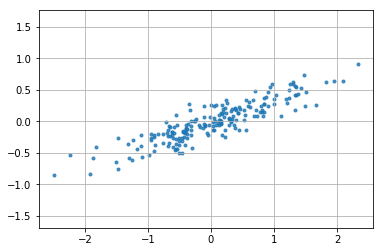

In [26]:
#二维数据降维
rng = np.random.RandomState(1)
data = np.dot(rng.rand(2,2),rng.randn(2,200))
df = pd.DataFrame({
    'X1':data[0,:],
    'X2':data[1,:]
})

plt.scatter(df['X1'],df['X2'],alpha=0.8,marker='.')
plt.axis('equal')
plt.grid()


[0.7625315]
[[-0.94446029 -0.32862557]]
1


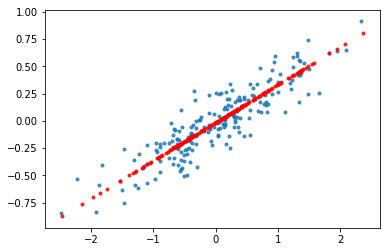

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1) #降为1维
pca.fit(df)

print(pca.explained_variance_) #特征值
print(pca.components_) #特征向量
print(pca.n_components_) #成分个数

# 0.76 *( -0.94*x1 + (-0.32*x2))

s_pca = pca.transform(df) #降维后的数据
s_new = pca.inverse_transform(s_pca) #转换成原始数据格式
s_pca

plt.scatter(df['X1'],df['X2'],alpha=0.8,marker='.')
plt.scatter(s_new[:,0],s_new[:,1],alpha=0.8,color='r',marker='.') 


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度为：1797条
数据形状为: (1797, 64)
[179.0069301  163.71774688]
[[ 9.67904155e-18 -1.73094600e-02 -2.23428812e-01 -1.35913321e-01
  -3.30323264e-02 -9.66340607e-02 -8.32941010e-03  2.26900518e-03
  -3.20516545e-04 -1.19308890e-01 -2.44451664e-01  1.48512757e-01
  -4.67319056e-02 -2.17740753e-01 -1.48136558e-02  4.47779806e-03
  -4.94136639e-05 -7.95419247e-02  8.33951562e-02  2.15915346e-01
  -1.72126796e-01 -1.63712111e-01  2.86444563e-02  4.23251870e-03
   9.85488403e-05  6.42319110e-02  2.54093322e-01 -3.56771077e-02
  -2.09462580e-01 -4.31311141e-02  5.13118785e-02  2.13422766e-04
   0.00000000e+00  1.59950875e-01  3.68690778e-01  1.64406843e-01
   8.52007896e-02  3.72983136e-02  2.15866999e-02  0.00000000e+00
   1.28865588e-03  1.06945281e-01  3.03067449e-01  2.47813075e-01
   2.09637285e-01  1.22325413e-02 -3.69458507e-02  1.61485020e-03
   6.93023672e-04 -8.35144008e-03 -5.58598876e-02  9.30534502e-02
   1.07387727e-01 -

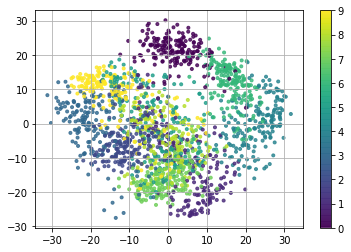

In [55]:
# 多维数据降维

from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print('数据长度为：%i条'%len(digits['data']))
print('数据形状为:',digits.data.shape)
digits.data[:2]


pca = PCA(n_components=2)
pca.fit(digits.data)
projected = pca.transform(digits.data)
projected[:5]

#digits.data[:5]

print(pca.explained_variance_) #特征值
print(pca.components_) #特征向量
print(pca.n_components_) #成分个数


plt.scatter(projected[:,0],projected[:,1],alpha=0.8,c=digits.target,marker='.') 
plt.grid()
plt.colorbar()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度为：1797条
数据形状为: (1797, 64)
[179.0069301  163.71774688 141.78843908 101.1003751   69.51316132
  59.1084913   51.88450266  44.01506653  40.31064987  37.01155491]


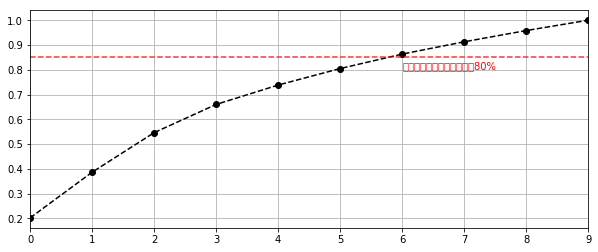

In [60]:
#降成10个维度
digits = load_digits()
print(digits.keys())
print('数据长度为：%i条'%len(digits['data']))
print('数据形状为:',digits.data.shape)
digits.data[:2]


pca = PCA(n_components=10)
pca.fit(digits.data)
projected = pca.transform(digits.data)
projected[:5]

#digits.data[:5]

print(pca.explained_variance_) #特征值
#print(pca.components_) #特征向量
#print(pca.n_components_) #成分个数


s=pca.explained_variance_
c_s = pd.DataFrame({
    'b':s,
    'b_sum':s.cumsum()/s.sum()    
})
c_s['b_sum'].plot(style='--ko',figsize=(10,4))
plt.axhline(0.85,color='r',linestyle='--',alpha=0.8)
plt.text(6,c_s['b_sum'].iloc[6]-0.06,'第七个成分累计贡献率超过80%',color='r')
plt.grid()